<a href="https://colab.research.google.com/github/Benmoussa-marouane/data-science/blob/master/House_pricing_MeVal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import shutil

zipOutputName = "house_data"
fileType = "zip"
path = "/content/drive/My Drive/Colab Notebooks/data science_kaggle/"
fileName = "home-data-for-ml-course.zip"

shutil.make_archive(zipOutputName,fileType,path,fileName)



'/content/drive/My Drive/Colab Notebooks/data science_kaggle/house_data.zip'

In [0]:
!unzip '/content/drive/My Drive/Colab Notebooks/data science_kaggle/home-data-for-ml-course.zip'

%cd drive/My\ Drive/Colab\ Notebooks/data\ science_kaggle
!pwd
!ls

Archive:  /content/drive/My Drive/Colab Notebooks/data science_kaggle/home-data-for-ml-course.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/data science_kaggle'
/content/drive/My Drive/Colab Notebooks/data science_kaggle
/content/drive/My Drive/Colab Notebooks/data science_kaggle
home-data-for-ml-course      house_data.zip	    test.csv
home-data-for-ml-course.zip  sample_submission.csv  train.csv


KeyboardInterrupt: ignored

#### import libraries

In [0]:
# Obviously
import pandas as pd

import math

import seaborn as sns


# !pip install xgboost
import numpy as np 

# To build our pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# !pip install impyute
# from impyute.imputation.cs import mice

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# Other helpers
from sklearn.metrics import accuracy_score, classification_report

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


!pip install category_encoders

from category_encoders.target_encoder import TargetEncoder

1.14.0


In [0]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow
print(tensorflow.__version__)

1.14.0


Using TensorFlow backend.


### The Dataset

In [0]:
# Read data into Pandas DataFrame
train_data = pd.read_csv("/content/train.csv", index_col='Id') 
test_data = pd.read_csv("/content/test.csv", index_col='Id') 

# Seperate target from predictors
communes_df = data.drop(['SalePrice'], axis=1)
y = data.SalePrice

# Drop Columns with over 80% missing data
columns_to_drop = [column for column in test_data if test_data[column ]]
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
communes_df.drop(columns_to_drop, axis=1, inplace=True)
missing = communes_df.isnull().sum()

print(communes_df.shape)
print(missing.sort_values(ascending=False))
# communes_df.head()

(1460, 76)
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageQual        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
ExterCond          0
ExterQual          0
YearBuilt          0
Foundation         0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
YearRemodAdd       0
SaleCondition      0
OverallCond        0
Utilities          0
MSSubClass         0
MSZoning           0
LotArea            0
                ... 
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
GarageCars         0
Fireplaces         0
Functional         0
KitchenQual        0
BsmtUnfSF          0
KitchenAbvGr       0
Be

### seperate categorical data and numerical data, in seperate dataframes

In [0]:
# categorical

dff = communes_df.select_dtypes(exclude=["number"])
df_categorical = dff.fillna(dff.mode().iloc[0]) # impute missing data using Mode or most frequent For categorical data 


# numerical
##############################

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = communes_df.select_dtypes(include=numerics).astype(float)

# for f in df_numeric.columns: 
#   df_numeric[f].fillna((df_numeric[f].mean()), inplace=True)

In [0]:
# impute by mice
!pip install impyute
from impyute.imputation.cs import mice


df_num_com = mice(df_numeric)

/usr/local/lib/python3.6/dist-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [0]:
df_num_com.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
dtype: int64

In [0]:
df_numeric.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

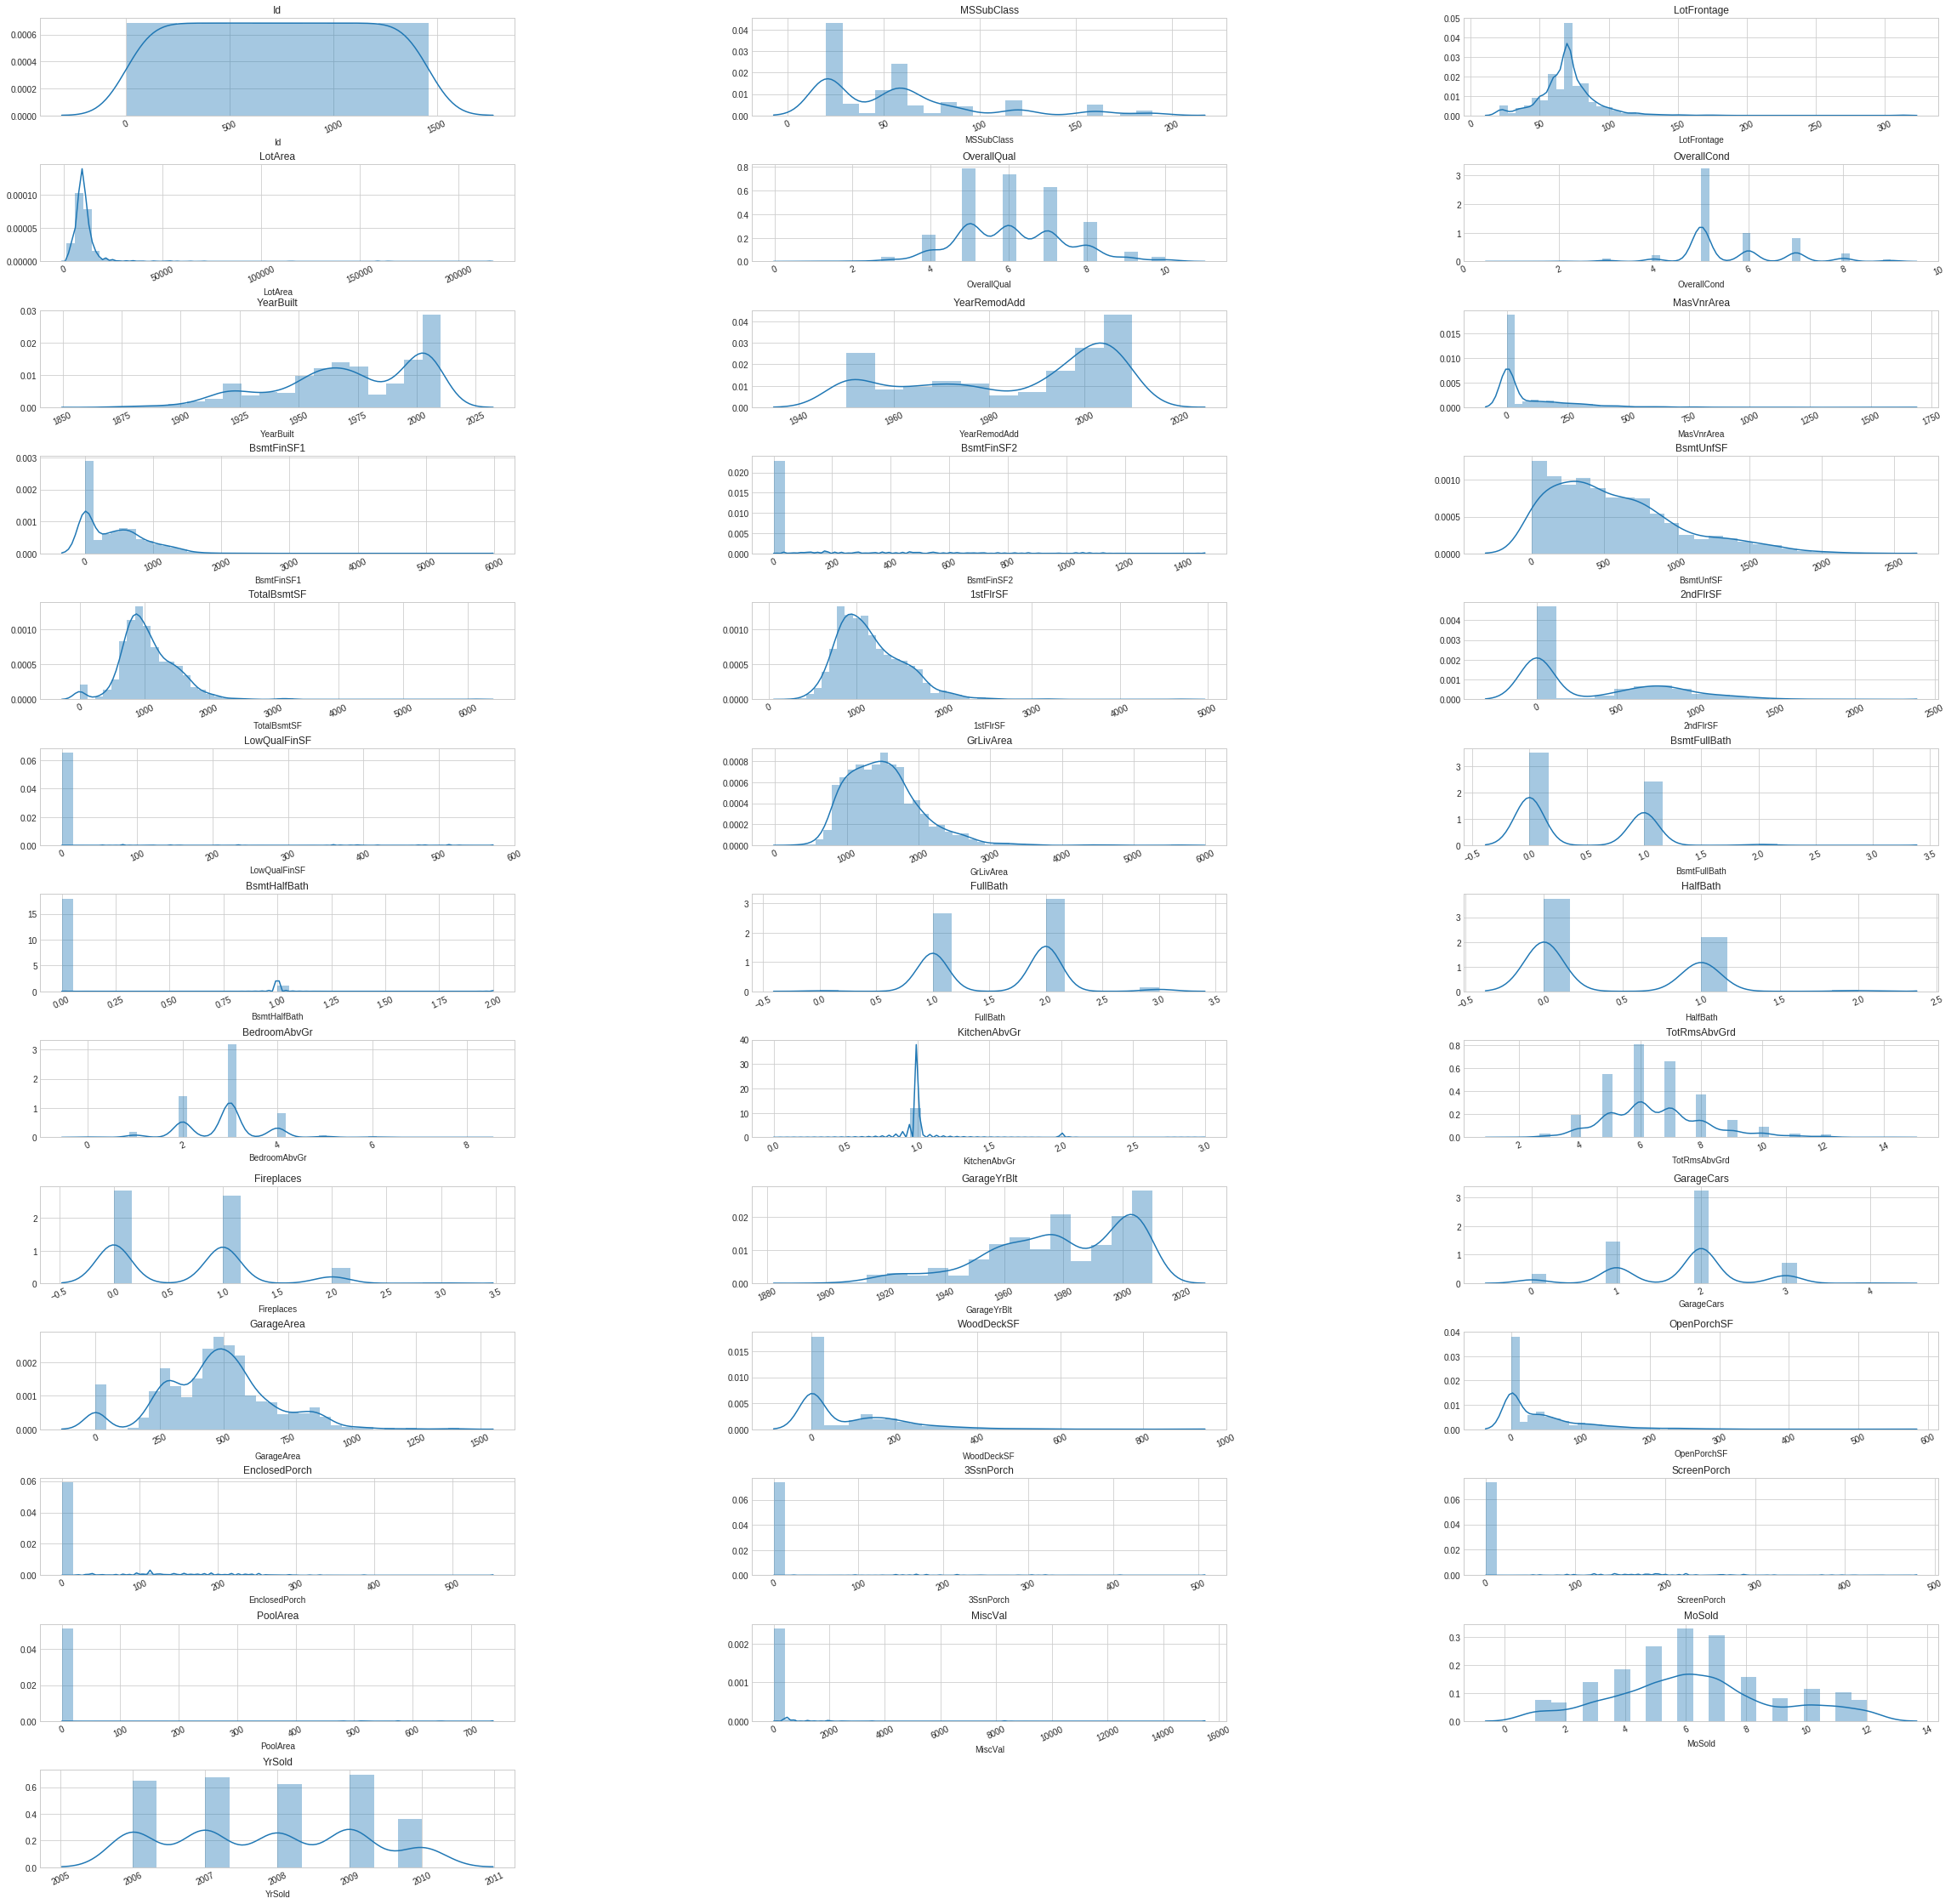

In [0]:
def plot_distribution(dataset, cols=5, width=20, height=45, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df_numeric, cols=3, width=40, height=40, hspace=0.5, wspace=0.5)

In [0]:
![categorical_dist](https://drive.google.com/file/d/1CKOwndhp47xm0sAxLe8EkYaiyhAe77zL/view?usp=sharing)

/bin/bash: -c: line 0: syntax error near unexpected token `https://drive.google.com/file/d/1CKOwndhp47xm0sAxLe8EkYaiyhAe77zL/view?usp=sharing'
/bin/bash: -c: line 0: `[categorical_dist](https://drive.google.com/file/d/1CKOwndhp47xm0sAxLe8EkYaiyhAe77zL/view?usp=sharing)'


In [0]:
# Source: https://maxhalford.github.io/blog/target-encoding-done-the-right-way/
def calc_smooth_mean(df1, cat_name, target, weight):
    # Compute the global mean
    mean = communes_df[target].mean()

    # Compute the number of values and the mean of each group
    agg = communes_df.groupby(cat_name)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + weight * mean) / (counts + weight)

    return df1[cat_name].map(smooth)

**Feature** 'codgeo' has 36677 unique categories note good idea to use target encoding

Feature 'libgeo' has 34125 unique categories

Feature 'dep' has 100 unique categories

Feature 'cp' has 100 unique categories

In [0]:
WEIGHT = 300
df_categorical['codgeo'] = calc_smooth_mean(df1=communes_df, cat_name='codgeo', target='camping', weight=WEIGHT).astype('category')
df_categorical['libgeo'] = calc_smooth_mean(df1=communes_df, cat_name='libgeo', target='camping', weight=WEIGHT).astype('category')
df_categorical['dep'] = calc_smooth_mean(df1=communes_df, cat_name='dep', target='camping', weight=WEIGHT).astype('category')
df_categorical['cp'] = calc_smooth_mean(df1=communes_df, cat_name='cp', target='camping', weight=WEIGHT).astype('category')

In [0]:
#0.137693	0.137693	0.0883396	0.0883396
#
#

df_categorical[['codgeo','libgeo','dep','cp']].head()

,codgeo,libgeo,dep,cp
0,0.137693,0.137693,0.143874,0.143874
1,0.137693,0.137693,0.143874,0.143874
2,0.137693,0.137693,0.143874,0.143874
3,0.141015,0.141015,0.143874,0.143874
4,0.137693,0.137693,0.143874,0.143874


In [0]:
# Decide which categorical variables you want to use in model
for col_name in df_categorical.columns:
#     if df_numeric[col_name].dtypes == 'object':
      unique_cat = len(df_categorical[col_name].unique())
      print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'codgeo' has 2 unique categories
Feature 'orientation_economique' has 5 unique categories
Feature 'seg_croissance_pop' has 2 unique categories
Feature 'libgeo' has 35 unique categories
Feature 'dep' has 99 unique categories
Feature 'urbanite_ruralite' has 6 unique categories
Feature 'dynamique_demographique_bv' has 7 unique categories
Feature 'seg_environnement_demographique_obsolete' has 8 unique categories
Feature 'environnement_demographique' has 7 unique categories
Feature 'syn_medical' has 3 unique categories
Feature 'seg_cap_fiscale' has 3 unique categories
Feature 'seg_dyn_entre' has 3 unique categories
Feature 'dyn_setc' has 3 unique categories
Feature 'cp' has 99 unique categories
Feature 'score_equipement_de_sante_bv' has 5 unique categories


In [0]:
df_categorical['urbanite_ruralite'].value_counts()

Com rurale < 2 000 m habts    30052
Com < 10 m habts               2505
Com > 200 m habts              1369
Com < 50 m habts               1325
Com < 200 m habts               836
Com rurale > 2 000 habts        590
Name: urbanite_ruralite, dtype: int64

In [0]:
# In this case, bucket low frequecy categories as "Other"
df_categorical['urbanite_ruralite'] = ['Com rurale < 2 000 m habts ' if x == 'Com rurale < 2 000 m habts' else 'Other' for x in df_categorical['urbanite_ruralite']]

print(df_categorical['urbanite_ruralite'].value_counts().sort_values(ascending=False))

Com rurale < 2 000 m habts     30052
Other                           6625
Name: urbanite_ruralite, dtype: int64


In [0]:
df_categorical['seg_cap_fiscale'].value_counts() 

Fiscalité moyenne    28780
Fiscalité faible      6628
Fiscalité élevée      1269
Name: seg_cap_fiscale, dtype: int64

In [0]:
# In this case, bucket low frequecy categories as "Other"
df_categorical['seg_cap_fiscale'] = ['Fiscalité moyenne' if x == 'Fiscalité moyenne' else 'Other' for x in df_categorical['seg_cap_fiscale']]

print(df_categorical['seg_cap_fiscale'].value_counts().sort_values(ascending=False))

Fiscalité moyenne    28780
Other                 7897
Name: seg_cap_fiscale, dtype: int64


In [0]:
df_categorical['syn_medical'].value_counts()

Faible Synergie Médicale    24669
Forte Synergie Médicale      6048
Synergie Médicale            5960
Name: syn_medical, dtype: int64

In [0]:
# In this case, bucket low frequecy categories as "Other"
df_categorical['syn_medical'] = ['Faible Synergie Médicale' if x == 'Faible Synergie Médicale' else 'Other' for x in df_categorical['syn_medical']]

print(df_categorical['syn_medical'].value_counts().sort_values(ascending=False))

Faible Synergie Médicale    24669
Other                       12008
Name: syn_medical, dtype: int64


In [0]:
df_categorical['seg_dyn_entre'].value_counts()

Faible dynamique        30187
Dynamique Economique     5059
Moyenne dynamique        1431
Name: seg_dyn_entre, dtype: int64

In [0]:
# In this case, bucket low frequecy categories as "Other"
df_categorical['seg_dyn_entre'] = ['Faible dynamique' if x == 'Faible dynamique' else 'Other' for x in df_categorical['seg_dyn_entre']]

print(df_categorical['seg_dyn_entre'].value_counts().sort_values(ascending=False))

Faible dynamique    30187
Other                6490
Name: seg_dyn_entre, dtype: int64


In [0]:
df_categorical.dyn_setc.value_counts()

Faible Dynamique Serv et Com              31916
Bonne Dynamique Entreprise Serv et Com     3788
Dynamique Serv et Com                       973
Name: dyn_setc, dtype: int64

In [0]:
# In this case, bucket low frequecy categories as "Other"
df_categorical['dyn_setc'] = ['Faible Dynamique Serv et Com' if x == 'Faible Dynamique Serv et Com' else 'Other' for x in df_categorical['dyn_setc']]

print(df_categorical['dyn_setc'].value_counts().sort_values(ascending=False))

Faible Dynamique Serv et Com    31916
Other                            4761
Name: dyn_setc, dtype: int64


In [0]:
# df_categorical.seg_environnement_demographique_obsolete.value_counts()

In [0]:
# # In this case, bucket low frequecy categories as "Other"
# for x in df_categorical['seg_environnement_demographique_obsolete'] :
  
#     if x is 'Zone rurale en croissance démographique':  
#         df_categorical['seg_environnement_demographique_obsolete'] = 'Zone rurale en croissance démographique'
    
#     elif x is 'Zone rurale en déclin démographique':  
#         df_categorical['seg_environnement_demographique_obsolete'] = 'Zone rurale en déclin démographique'
    
#     else:
#         df_categorical['seg_environnement_demographique_obsolete'] = 'other'
        
        
    
# print(df_categorical['seg_environnement_demographique_obsolete'].value_counts().sort_values(ascending=False))

In [0]:
for c in df_categorical.columns:
  print(df_categorical[c].value_counts().sort_values(ascending=False).head(10))
  print()
 

0.137693    31610
0.141015     5067
Name: codgeo, dtype: int64

Bassin Résidentiel         16870
Bassin Urbain               8671
Bassin Industriel           7122
Bassins Agroalimentaire     2564
Bassin diversifié           1450
Name: orientation_economique, dtype: int64

en croissance démographique    36666
en déclin démographique           11
Name: seg_croissance_pop, dtype: int64

0.137693    27899
0.141015     4613
0.137237     1824
0.136784      558
0.140548      446
0.136334      244
0.140084      162
0.135887      150
0.139624      116
0.135443       66
Name: libgeo, dtype: int64

0.149452    894
0.082463    866
0.063123    816
0.107621    782
0.095163    745
0.072277    730
0.082866    707
0.104817    706
0.064900    693
0.076354    675
Name: dep, dtype: int64

Com rurale < 2 000 m habts     30052
Other                           6625
Name: urbanite_ruralite, dtype: int64

Grande Ville                                          8671
1.Accroissement par excédent naturel et migratoi

##pipeline


We'll define a new `ColumnTransformer` object that keeps our numerical features and apply one hot encoding on our categorical features. 

That will allow us to create a clean pipeline that includes both features engineering (one hot encoding here) and training the model (a nice way to avoid data leakage)

In [0]:
numeric_features =list(df_numeric)
numeric_features.remove('camping')

categorical_features =list(df_categorical)

te_features = ['codgeo','libgeo','dep','cp']


for i in te_features:
  categorical_features.remove(i)
 


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


                                 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
         ])

                                 
# target_encoding = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('TE', ce.TargetEncoder(cols=te_features) )
#          ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



In [0]:
# print(data.shape)

df_numeric = pd.DataFrame(data=X_incomplete,index= range(0,len(X_incomplete)),columns=X_incomplete.columns)  
# print(df_numeric.shape)

merged =pd.concat([df_numeric, df_categorical], axis=1)


#duplicated columns

merged = merged.loc[:,~merged.columns.duplicated()]

print(merged.shape)

(36677, 96)


Now we can define our 4 models as sklearn `Pipeline` objects, containing our preprocessing step and training of one given algorithm.

Let's split the data into training and test sets.

In [0]:
# Get X, y
y = merged['camping']
X = merged.drop("camping", axis=1)

# X.reset_index(drop=True).head()
np.shape(X)

(36677, 95)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=.3)

#MLP using keras


## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [0]:
def myModel():
    model = keras.Sequential([
        keras.layers.Dense(32, input_shape=(123,),activation = 'relu'),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    
    return model


In [0]:
from keras.wrappers.scikit_learn import KerasClassifier

from keras import callbacks


early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')

# wrap the model using the function you created
clf = KerasClassifier(build_fn=myModel, epochs=50, batch_size=32, verbose=1,validation_split=0.2, callbacks=[early_stopping])

# Now we have a full prediction pipeline.
Mdl = Pipeline(steps=[('preprocessor', preprocessor), ('clf',clf)])



Mdl.fit(X_train, y_train)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 32)                3968      
_________________________________________________________________
dense_44 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 129       
Total params: 8,321
Trainable params: 8,321
Non-trainable params: 0
_________________________________________________________________
Train on 20538 samples, validate on 5135 samples
Epoch 1/50
20538/20538 [==============================] - 2s 115us/step - loss: 0.3234 - acc: 0.8766 - val_loss: 0.2944 - val_acc: 0.8896
Epoch 2/50
20538/20538 [==============================] - 1s 62us/step - loss: 0.2871 - acc: 0.8911 - val_loss: 0.2797 - val_acc: 0.8931
Epoch 3/50
20538/20538 [==============================] -

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [0]:


import matplotlib.pyplot as plt
def plot_training(history):
    # Plot training & validation accuracy values
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.savefig('acc_vs_epochs.png')
    
plot_training(history)

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [0]:
predictions = Mdl.predict(X_test)
predictions

11004/11004 [==============================] - 0s 15us/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [0]:
predictions[0]

array([0.])

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [0]:
np.argmax(predictions[0])

0

So the model is most confident that sample 0 i test data is 0

In [0]:
y_test[0]

0.0